In [1]:
%matplotlib inline
%run ./lorenz_system.py
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from matplotlib import cm
import matplotlib
import numpy as np
import urllib2
import random
import math

In [2]:
num_pressure_systems = 10
max_border_length = 50
low_pressure = 'blue'
high_pressure = 'red'

low_pressure_force  = 3.5
high_pressure_force = 2.5

center_x = center_y = 0
x=0
y=1
vec='vec'
t='t'
pressure_types = [low_pressure, high_pressure]
pressure_systems = []

## Array Functions

Basic functions for list so they can behave like vectors.

In [3]:
def add(a1, a2):
    # note, not adding checking to see if the arrays
    # are the same length. IF they aren't, then this
    # will break.
    new_a = []
    
    for i in range(len(a1)):
        # add sum of two array elements
        new_a.append(a1[i] + a2[i])
        
    return new_a

In [4]:
def sub(a1, a2):
    # note, not adding checking to see if the arrays
    # are the same length. IF they aren't, then this
    # will break.
    new_a = []
    
    for i in range(len(a1)):
        # add sum of two array elements
        new_a.append(a1[i] - a2[i])
        
    return new_a

In [5]:
def div(a1, const):
    new_a = []
    
    for i in range(len(a1)):
        # add sum of two array elements
        new_a.append(a1[i] / const)
        
    return new_a

In [6]:
def mult(a1, const):
    new_a = []
    
    for i in range(len(a1)):
        # add sum of two array elements
        new_a.append(a1[i] * const)
        
    return new_a

In [7]:
def dot(a1, a2):
    # incomplete implementation of dot product
    
    total = 0
    
    for i in range(len(a1)):
        total += a1[i] * a2[i]
        
    return total

### Distance Functions 

In [8]:
def l1_distnace_2d(a1, a2):
    return abs(a1[0] - a2[0]) + abs(a1[1] - a2[1])

In [9]:
def l2_distance_2d(a1, a2):
    return (a1[0] - a2[0])**2 + abs(a1[0] - a2[1])**2

>...

In [10]:
def perpindicular_2d(a1):
    # http://mathworld.wolfram.com/PerpendicularVector.html
    return -a1[1], a1[0]

In [11]:
def unit_vector(a1):
    return div(a1, math.sqrt(float(dot(a1, a1))))

## Simulation Functions

In [12]:
def plot_points():
    fig = plt.figure()
    ax = fig.gca()
    
    # set plot details
    fig.set_figheight(max_border_length)
    fig.set_figwidth(max_border_length)

    # set axis limits
    limit_max = max_border_length + 2
    ax.set_ylim(-limit_max, limit_max)
    ax.set_xlim(-limit_max, limit_max)
    
    # plot each system
    for system in pressure_systems:
        x_cor = [a[x] for a in system[vec]]
        y_cor = [a[y] for a in system[vec]]
        
        ax.plot(x_cor, y_cor, '*-', color=system[t])

In [13]:
def bound_cor_value(cor):
    if cor < max_border_length and cor > -max_border_length:
        return cor
    elif cor < 0:
        return -max_border_length
    return max_border_length

In [14]:
def bound_coordinate_2d(cor):
    return bound_cor_value(cor[x]), bound_cor_value(cor[y])

This will simulate a step in time where the two pressure systems interact with eachother. For reference the following list shows what happens when there are two systems.
1. low and high: clockwise rotation
2. high and high: away from
3. low and low: away from

In [15]:
def simulate_step():
    for i in range(num_pressure_systems):
        # get index for current length of arrays before the appends begin
        size = len(pressure_systems[i][vec]) - 1
        
        # get unity vector conversions for index i
        unit_i_vector = unit_vector(pressure_systems[i][vec][size])
        
        # initialize forces
        force = [0,0]

        # apply forces from other systems
        for j in range(num_pressure_systems):
            # ignore this current pressure system
            if i == j:
                continue
                
            # get unit vector conversions for index j
            unit_j_vector = unit_vector(pressure_systems[j][vec][size])
            
            ## Forces applies by pressure systems
            # calculate vector differerences 
            new_force = sub(unit_i_vector, unit_j_vector)

            # check if pressure system types match
            if pressure_systems[i][t] != pressure_systems[j][t]:
                # calculate vector differerences so they pull towards eachother 
                # and get perpindicular result
                new_force = perpindicular_2d(mult(new_force, -1))
                
            # reduce force based on distance between coordinates
            new_force = div(new_force, l2_distance_2d(unit_i_vector, unit_j_vector))
            
            # add forces together
            force = add(force, unit_vector(new_force))
                
        ## Forces applied by center of system
        c_force = None
        if pressure_systems[i][t] == low_pressure:
            c_force = mult(unit_i_vector, -1 * low_pressure_force)
        else:
            c_force = mult(unit_i_vector, -1 * high_pressure_force)
        
        # calculate new values
        new_coordinate = add(add(pressure_systems[i][vec][size], c_force), force)
        pressure_systems[i][vec].append(bound_coordinate_2d(new_coordinate))

## Run

Initialize systems with random starting points and pressure types.

In [16]:
for i in range(num_pressure_systems):
    pressure_systems.append({'vec': [[]],'t':random.choice(pressure_types)})
    
    # give random coordinate for first point
    pressure_systems[i][vec][0].append(random.randrange(-max_border_length, max_border_length))
    pressure_systems[i][vec][0].append(random.randrange(-max_border_length, max_border_length))

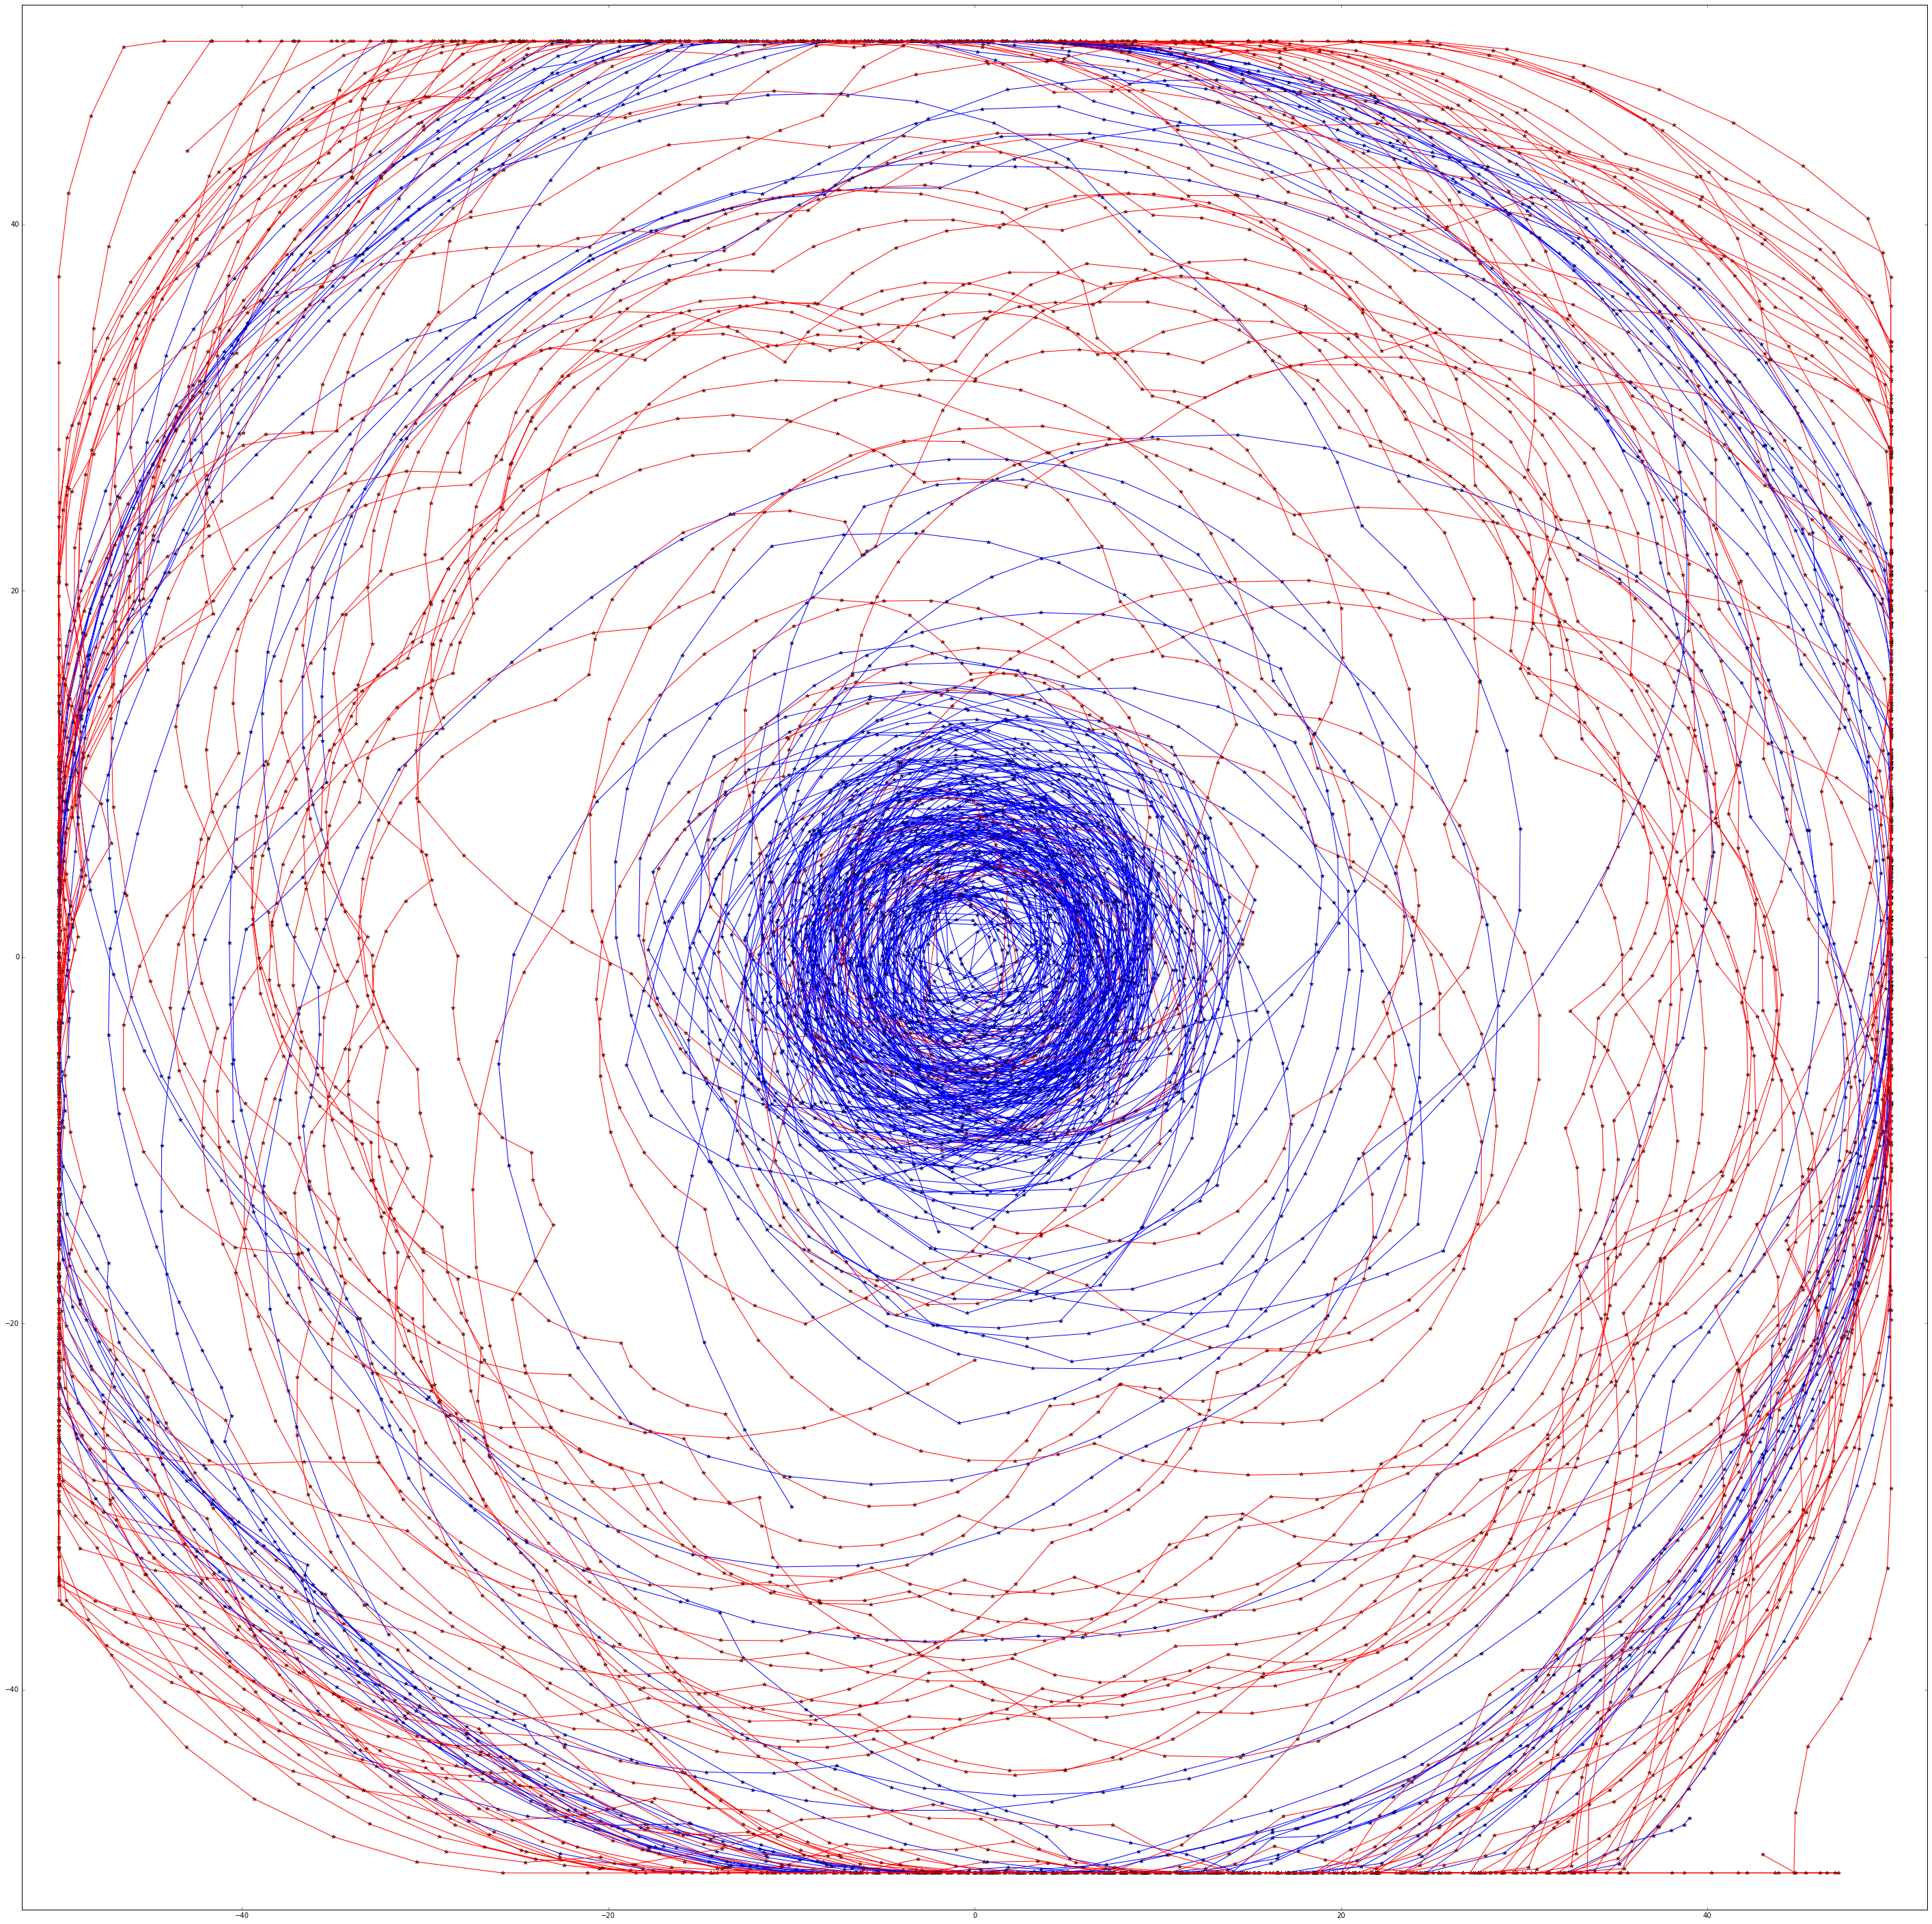

In [17]:
for i in range(1000):
    simulate_step()
plot_points()

In [19]:
for system in pressure_systems:
    print system[t]

red
blue
blue
blue
red
red
blue
red
red
blue
